In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback.csv


In [ ]:
import pandas as pd

df = pd.read_csv('student_feedback.csv')
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)  # if exists
df.isnull().sum()  # check missing
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Student ID                                            1001 non-null   int64
 1   Well versed with the subject                          1001 non-null   int64
 2   Explains concepts in an understandable way            1001 non-null   int64
 3   Use of presentations                                  1001 non-null   int64
 4   Degree of difficulty of assignments                   1001 non-null   int64
 5   Solves doubts willingly                               1001 non-null   int64
 6   Structuring of the course                             1001 non-null   int64
 7   Provides support for students going above and beyond  1001 non-null   int64
 8   Course recommendation based on relevance              1001 non-null   int64
dty

/tmp/ipython-input-4-1160032851.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='viridis')


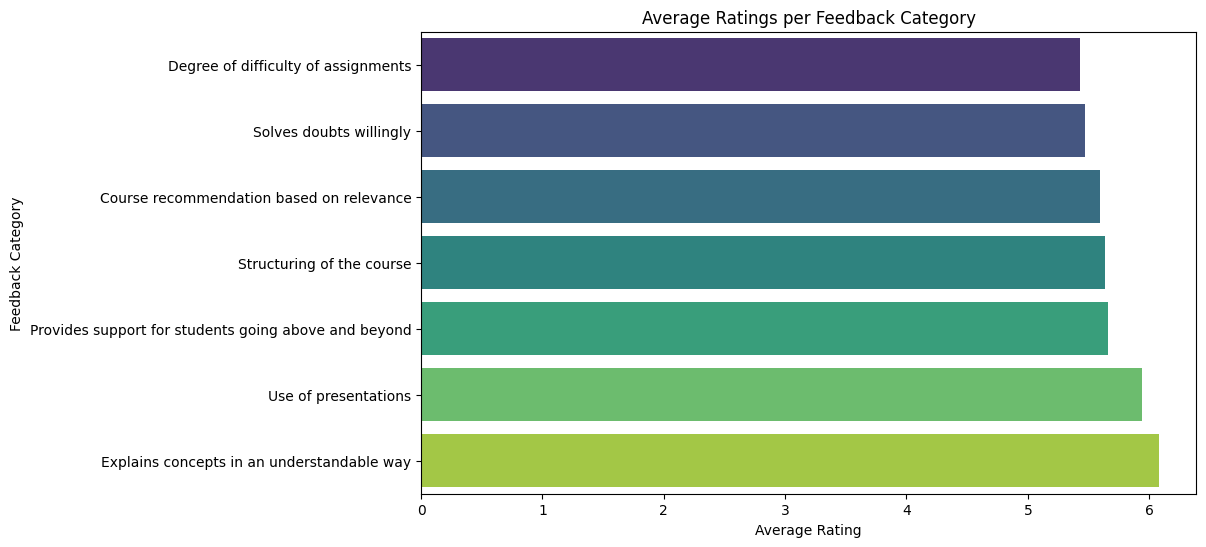

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average rating per question
rating_columns = df.columns[2:]  # adjust if needed
average_ratings = df[rating_columns].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.values, y=average_ratings.index, palette='viridis')
plt.title('Average Ratings per Feedback Category')
plt.xlabel('Average Rating')
plt.ylabel('Feedback Category')
plt.show()


In [ ]:
import random

sample_comments = [
    "The event was amazing!", "I learned a lot.", "Too crowded.",
    "Well-organized and fun!", "Poor time management.", "Loved it!",
    "The speaker was very engaging.", "Not enough interaction."
]

# Add simulated comments
df['Feedback'] = [random.choice(sample_comments) for _ in range(len(df))]


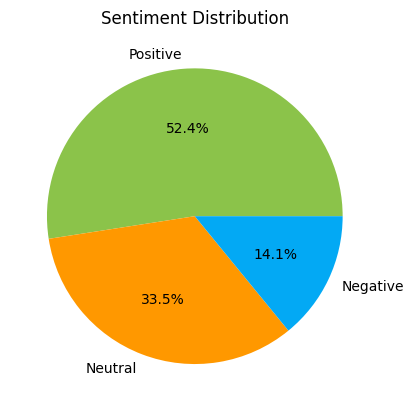

In [ ]:
from textblob import TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Polarity'] = df['Feedback'].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment_label)

# Pie chart of sentiment
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#8BC34A','#FF9800','#03A9F4'], title='Sentiment Distribution')
plt.ylabel("")
plt.show()


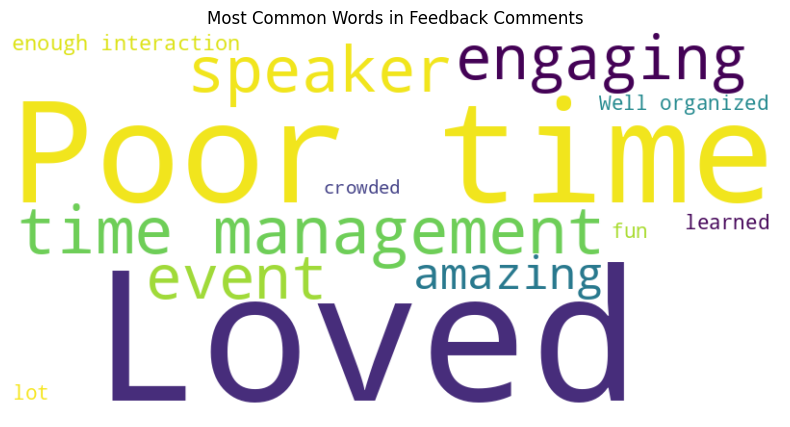

In [ ]:
from wordcloud import WordCloud

text = " ".join(df["Feedback"])
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Feedback Comments")
plt.show()


In [ ]:
!pip install textblob
!pip install wordcloud


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud


In [ ]:
from textblob import TextBlob

df['Polarity'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


In [ ]:
print(df.columns)


Index(['Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance', 'Feedback', 'Polarity',
       'Sentiment'],
      dtype='object')


In [ ]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]


In [ ]:
df['Feedback'] = df['Feedback'].fillna('')


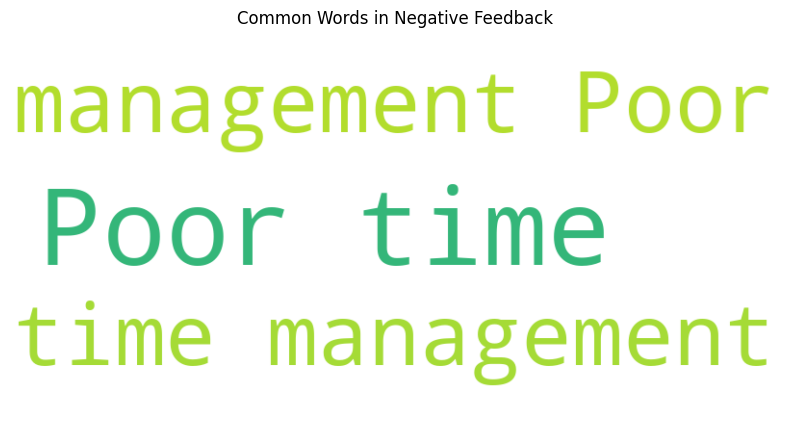

In [ ]:
# Filter only negative comments
negative_feedback = df[df['Sentiment'] == 'Negative']['Feedback']

# Join all negative comments into one string
negative_text = " ".join(negative_feedback)

# Generate word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Negative Feedback")
plt.show()


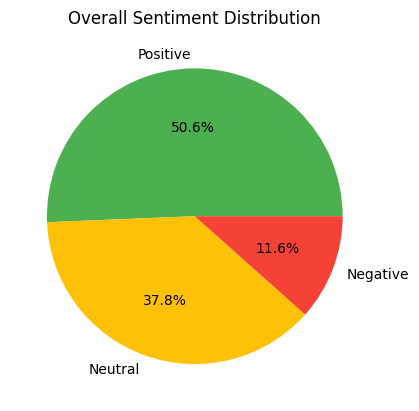

In [ ]:
# Pie chart of sentiment categories
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#4CAF50','#FFC107','#F44336'], title='Overall Sentiment Distribution')
plt.ylabel("")
plt.show()


In [ ]:
print(df.columns[2:10])


Index(['Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance', 'Feedback'],
      dtype='object')


In [ ]:
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# Now calculate average ratings
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)

# Show top 3
print("Top 3 Feedback Categories by Rating:")
print(avg_ratings.head(3))


Top 3 Feedback Categories by Rating:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64


In [ ]:
# Define only the numeric feedback columns (not including index or ID)
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# Calculate average rating per category
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)

# Display top 3
print("🔝 Top 3 Feedback Categories by Rating:")
print(avg_ratings.head(3))


🔝 Top 3 Feedback Categories by Rating:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64


In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
avg_ratings = df[numeric_columns[2:]].mean().sort_values(ascending=False)  # skip Unnamed and ID
print(avg_ratings.head(3))


Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
dtype: float64


Top 3 Feedback Categories by Average Rating:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64


/tmp/ipython-input-27-310184694.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_categories.values, y=top_3_categories.index, palette="crest")


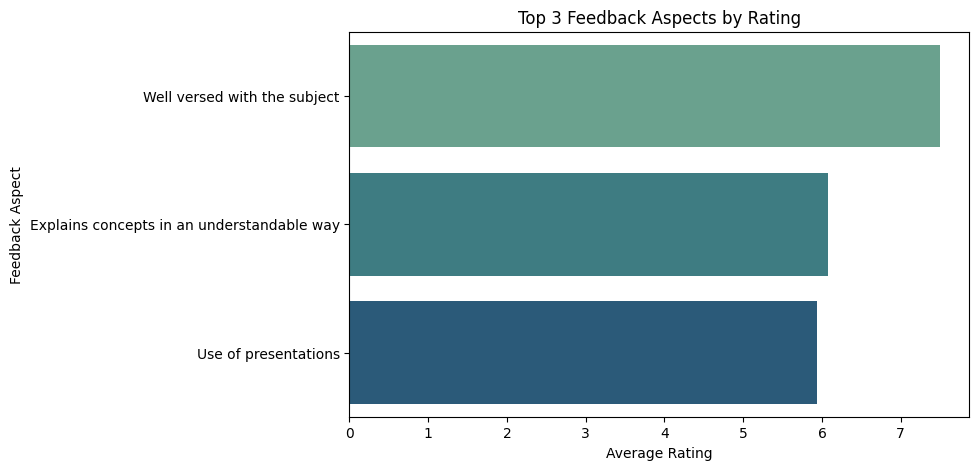

In [ ]:
# ✅ Make sure only rating columns are used (not text or unrelated columns)
rating_columns = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

# ✅ Calculate average ratings for each feedback aspect
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)

# ✅ Display top 3 categories
top_3_categories = avg_ratings.head(3)
print("Top 3 Feedback Categories by Average Rating:")
print(top_3_categories)

# ✅ Optional: Visualize top 3 using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_categories.values, y=top_3_categories.index, palette="crest")
plt.title("Top 3 Feedback Aspects by Rating")
plt.xlabel("Average Rating")
plt.ylabel("Feedback Aspect")
plt.show()


Average Rating by Sentiment:
Sentiment
Negative    6.052802
Neutral     5.816138
Positive    5.958087
Name: Avg_Rating, dtype: float64


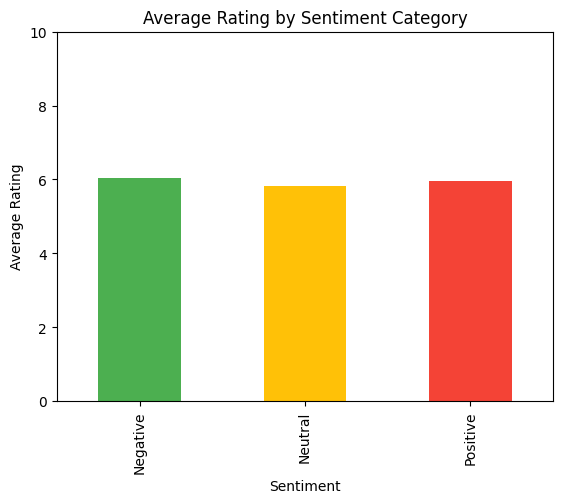

In [ ]:
# Calculate average of all ratings per row to get one score per student
df['Avg_Rating'] = df[rating_columns].mean(axis=1)

# Group by sentiment and calculate average rating
sentiment_rating = df.groupby('Sentiment')['Avg_Rating'].mean()

print("Average Rating by Sentiment:")
print(sentiment_rating)

# Plot it
sentiment_rating.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Average Rating by Sentiment Category")
plt.xlabel("Sentiment")
plt.ylabel("Average Rating")
plt.ylim(0, 10)  # Adjust if your rating scale is 1–10
plt.show()


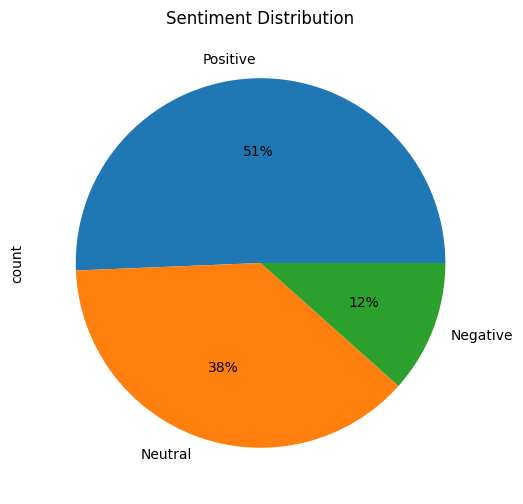

In [ ]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Feedback'].apply(get_sentiment)

# Pie chart
df['Sentiment'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(6,6))
plt.title("Sentiment Distribution")
plt.show()
